In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
#read csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
# To avoid encoding error 'unicode escape' is being used 

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#droping unwanted columns, here axis represents that the whole columns will get affected, and inplace=True will change the value in the dataframe in which the csv file is assigned
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
#To check whether we have removed the required those succesfull or not, we can check the columns present currrently.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
# pd.isnull(df) --> will generate a boolean array where ever the value is null it will give True as output.
pd.isnull(df).sum()# --> will give the sum of each columns values who are null. 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#To drop the null rows
df.dropna(inplace=True)

In [10]:
#to check that the rows has been dropped which contained null value successfully. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
#One of the most important method "describe()", which returns description of data in the data frame (eg., count, min, max, mean, std etc) 
df.describe() 
# One thing to notice here is we are only able to see the columns whose data type is int or float,object datatype columns doesn't come under description() method output.

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
df[['Age','Orders','Amount']].describe()
#Suppose you only want to see these descriptions for specific columns, then you can specify the column name and achieve that.

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


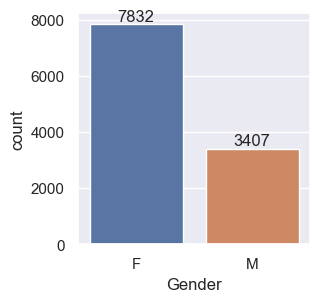

In [44]:
ax=sns.countplot(x='Gender',data=df,hue='Gender')
sns.set(rc={'figure.figsize':(4,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

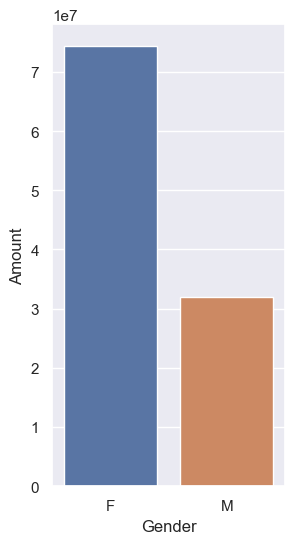

In [33]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum()
sns.set(rc={'figure.figsize':(3,6)})
sns.barplot(x = 'Gender', y='Amount',data = sales_gen,hue='Gender')

<Axes: xlabel='State', ylabel='Amount'>

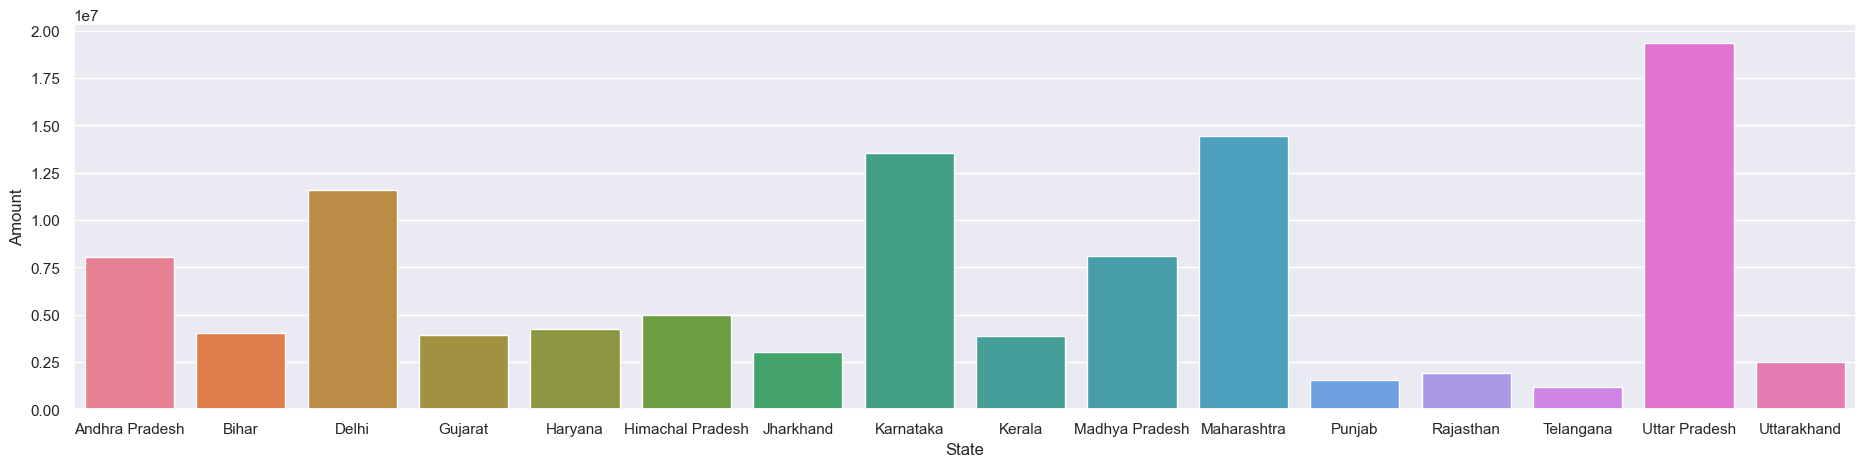

In [19]:
demorgraphy= df.groupby(['State'], as_index=False)['Amount'].sum()
sns.set(rc={'figure.figsize':(23,5)})
sns.barplot(x='State',y='Amount',data=demorgraphy,hue='State')

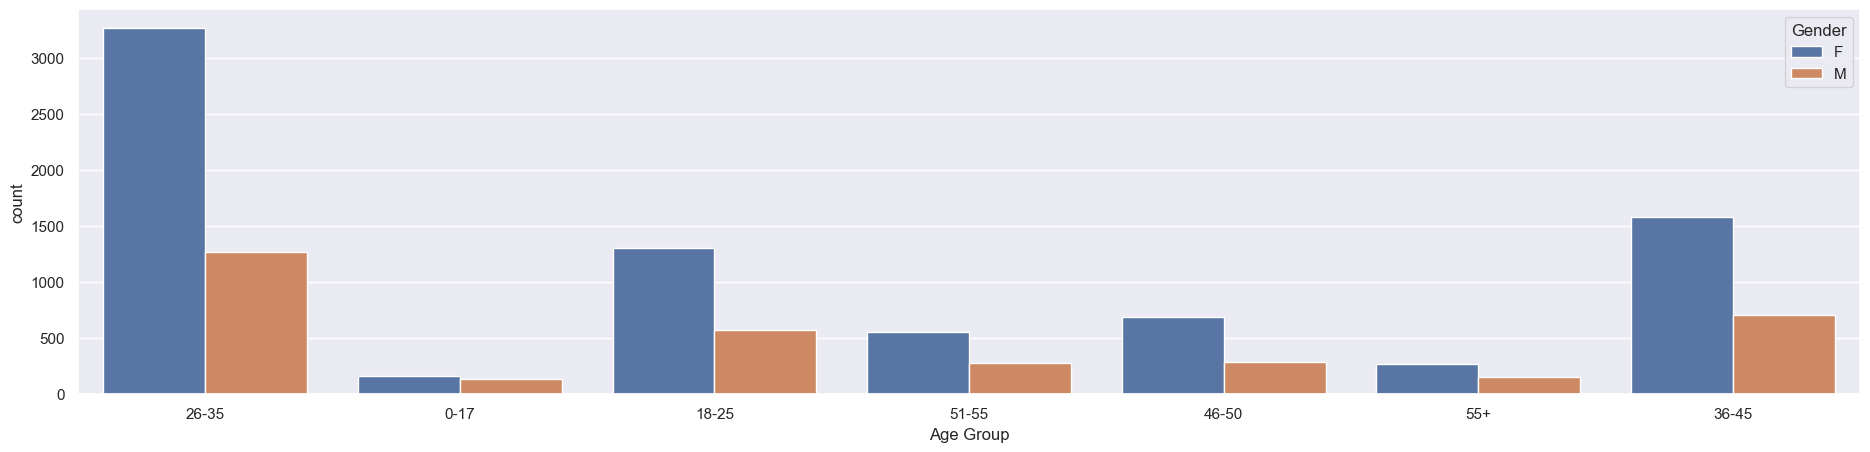

In [18]:
age = sns.countplot(x='Age Group', data=df, hue='Gender')

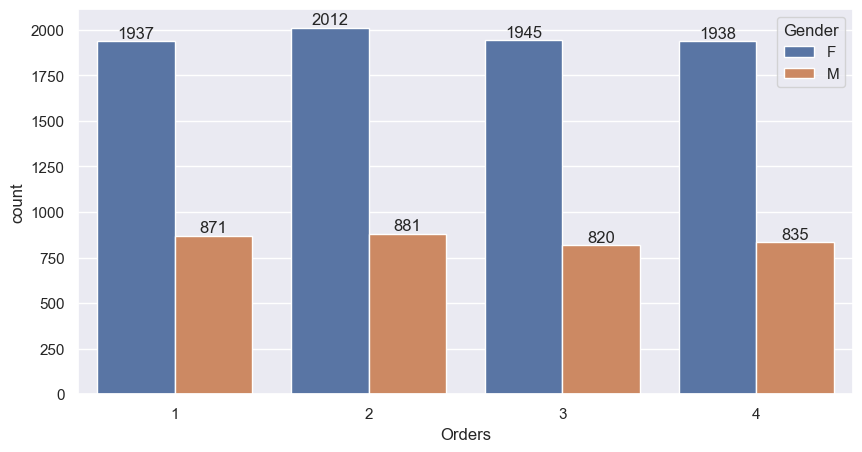

In [60]:
a=sns.countplot(data=df,x='Orders',hue='Gender')
sns.set(rc={'figure.figsize':(10,10)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

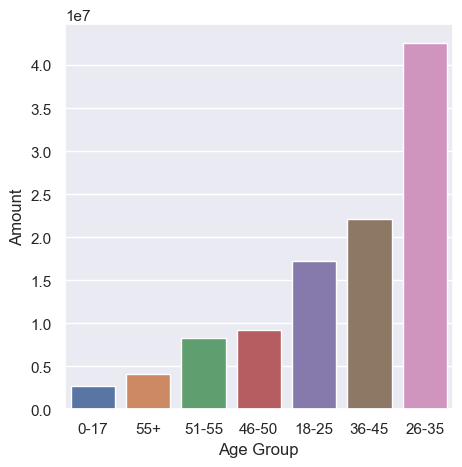

In [80]:
age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Age Group',y='Amount',data=age, hue='Age Group')